In [1]:
import pandas, numpy, scipy, seaborn, sklearn
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn import metrics

## functions & options


In [2]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

# I] Dataframe settings

In [3]:
%%time
#Download 10% of the big expression data with all the transcripts
path = input_file_directory + "/xenabrowser_brut_data/all_transcripts/gtex_Kallisto_tpm_10perc.tsv"
df = pandas.read_csv(path, sep = "\t")

print(df.shape)
df.set_index('sample', inplace = True)
df.index.name = None
df.head()

(19704, 787)
Wall time: 2.29 s


,GTEX-S4Q7-0003-SM-3NM8M,GTEX-QV31-1626-SM-2S1QC,GTEX-13OW5-0626-SM-5J2N2,GTEX-ZPCL-0126-SM-4WWC8,GTEX-S33H-1226-SM-4AD69,GTEX-X88G-0426-SM-47JZ5,GTEX-ZAKK-0326-SM-5EGHA,GTEX-1399S-1726-SM-5L3DI,GTEX-ZF29-0926-SM-4WKFZ,GTEX-13W3W-2626-SM-5SIA2,...,GTEX-13NYB-2726-SM-5J2MT,GTEX-WEY5-0526-SM-3GIKZ,GTEX-WZTO-1326-SM-3NM8X,GTEX-13NYS-2926-SM-5IFGH,GTEX-11DXZ-0326-SM-5EGH1,GTEX-13PVQ-2726-SM-5L3H7,GTEX-WL46-0011-R7A-SM-3LK7X,GTEX-11GSP-0006-SM-5N9EL,GTEX-1399U-2526-SM-5L3DL,GTEX-ZTTD-0326-SM-57WFW
ENST00000354449.7,1.2467,2.9134,2.5451,2.9667,1.2556,3.1329,1.7870,2.8701,2.7255,0.9640,...,1.0776,2.7763,1.2079,2.0872,0.7626,3.0869,1.6247,-0.4293,0.3147,3.7709
ENST00000354956.9,1.6273,0.9062,-2.1677,-1.0095,-2.0883,-9.9658,1.0377,1.7143,1.2445,-0.7949,...,0.5969,-0.5071,-1.8905,-3.3262,-0.0689,-2.3592,-4.0243,0.7420,-0.2597,2.6388
ENST00000548312.5,0.6076,-9.9658,-2.0383,-2.4547,-9.9658,-2.0296,-2.8442,-2.8942,-9.9658,-4.1466,...,-9.9658,-2.9253,-5.1778,-0.9757,-3.7210,-9.9658,-9.9658,-3.3207,-3.6066,-2.8274
ENST00000527779.1,2.6670,-0.3332,1.9686,0.8771,0.5483,0.8687,-1.4169,0.7208,-0.0964,-2.5380,...,-2.1829,-9.9658,-9.9658,1.3433,-1.1996,-0.2697,-2.8383,-1.7300,-0.4357,-0.1985
ENST00000454820.5,-9.9658,-9.9658,-4.0293,-9.9658,-9.9652,-3.0899,-9.9658,-9.9658,-9.9658,-9.9658,...,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9653,-9.9658,-6.5950,-7.7254,-9.9658


In [4]:
#Calcul to have value from log2;
print('log2(tpm+0.001) ', df.min().min())
df = 2**df
print('tpm ', df.min().min())
df = numpy.log2(df+1)
print('log2(tpm+1) ', df.min().min())
df.head()

log2(tpm+0.001)  -9.9658
tpm  0.0009999891070171633
log2(tpm+1)  0.0014419584743536123


,GTEX-S4Q7-0003-SM-3NM8M,GTEX-QV31-1626-SM-2S1QC,GTEX-13OW5-0626-SM-5J2N2,GTEX-ZPCL-0126-SM-4WWC8,GTEX-S33H-1226-SM-4AD69,GTEX-X88G-0426-SM-47JZ5,GTEX-ZAKK-0326-SM-5EGHA,GTEX-1399S-1726-SM-5L3DI,GTEX-ZF29-0926-SM-4WKFZ,GTEX-13W3W-2626-SM-5SIA2,...,GTEX-13NYB-2726-SM-5J2MT,GTEX-WEY5-0526-SM-3GIKZ,GTEX-WZTO-1326-SM-3NM8X,GTEX-13NYS-2926-SM-5IFGH,GTEX-11DXZ-0326-SM-5EGH1,GTEX-13PVQ-2726-SM-5L3H7,GTEX-WL46-0011-R7A-SM-3LK7X,GTEX-11GSP-0006-SM-5N9EL,GTEX-1399U-2526-SM-5L3DL,GTEX-ZTTD-0326-SM-57WFW
ENST00000354449.7,1.754024,3.093208,2.773255,3.140363,1.760291,3.288649,2.154118,3.055050,2.928635,1.561063,...,1.637157,2.972864,1.726836,2.392105,1.431112,3.247424,2.029905,0.801260,1.165914,3.872895
ENST00000354956.9,2.031869,1.523112,0.289911,0.581803,0.304695,0.001442,1.610205,2.098074,1.752476,0.656618,...,1.329102,0.768617,0.344503,0.137116,0.965961,0.256889,0.086045,1.418186,0.875986,2.853623
ENST00000548312.5,1.335553,0.001442,0.314349,0.241737,0.001442,0.316056,0.188091,0.182071,0.001442,0.079240,...,0.001442,0.178419,0.039316,0.593108,0.105456,0.001442,0.001442,0.137615,0.113824,0.190155
ENST00000527779.1,2.877955,0.842998,2.296863,1.504203,1.300043,1.498770,0.458924,1.404955,0.952605,0.229196,...,0.287156,0.001442,0.001442,1.822653,0.521449,0.871443,0.188813,0.380122,0.798536,0.904161
ENST00000454820.5,0.001442,0.001442,0.085756,0.001442,0.001443,0.160208,0.001442,0.001442,0.001442,0.001442,...,0.001442,0.001442,0.001442,0.001442,0.001442,0.001442,0.001442,0.014847,0.006801,0.001442


In [ ]:
# zcore on df row  + heatmap
df = df.apply(stats.zscore)
seaborn.heatmap(df) 

#zscore on row + heatmap
array_r = stats.zscore(df, axis = 0)
seaborn.heatmap(array_r)

# ARE THE SAME. One result in array, the other DF

In [12]:
#zscore
array = stats.zscore(df, axis = None)

<AxesSubplot:>

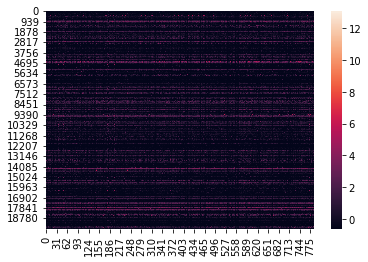

In [13]:
seaborn.heatmap(array) 

In [ ]:
#zscore
df = df.apply(stats.zscore)
df.head()

In [ ]:
#see what is the total sum expression of the two isoforms
genes = "ENST00000354449.7", "ENST00000354956.9"
g_names = "ATG7_1", "ATG7_2"
for i in range(len(genes)):
    print(f'{g_names[i]}: {df.loc[genes[i], :].sum()}')

In [ ]:
ATG7_2_sum = 115.21

print('shape before filtering', df.shape)
#create boolean and select the genes where sum is higher than ATG7(2) sum expression
bool_higher_iso2 = df.sum(axis=1) > ATG7_2_sum 
df = df[bool_higher_iso2]

print('shape after filtering', df.shape)

In [ ]:
#look shit
seaborn.heatmap(df) 

In [21]:
practice = df.iloc[0:50,0:50]
practice

,GTEX-S4Q7-0003-SM-3NM8M,GTEX-QV31-1626-SM-2S1QC,GTEX-13OW5-0626-SM-5J2N2,GTEX-ZPCL-0126-SM-4WWC8,GTEX-S33H-1226-SM-4AD69,GTEX-X88G-0426-SM-47JZ5,GTEX-ZAKK-0326-SM-5EGHA,GTEX-1399S-1726-SM-5L3DI,GTEX-ZF29-0926-SM-4WKFZ,GTEX-13W3W-2626-SM-5SIA2,...,GTEX-ZPCL-0004-SM-4WWD6,GTEX-X5EB-0326-SM-4QASF,GTEX-11DXY-1526-SM-5H129,GTEX-ZPIC-0005-SM-4WWEB,GTEX-13G51-2126-SM-5IJD9,GTEX-Y5V6-2826-SM-4VDSF,GTEX-Y111-1826-SM-4SOIR,GTEX-TMZS-0001-SM-3P61Q,GTEX-11XUK-1426-SM-5EQMG,GTEX-WOFM-0526-SM-4OOS2
ENST00000354449.7,1.754024,3.093208,2.773255,3.140363,1.760291,3.288649,2.154118,3.055050,2.928635,1.561063,...,1.992011,3.317586,3.061385,2.124358,2.691449,3.677874,2.865694,2.006558,2.562890,2.795139
ENST00000354956.9,2.031869,1.523112,0.289911,0.581803,0.304695,0.001442,1.610205,2.098074,1.752476,0.656618,...,2.314093,0.818009,0.001442,3.220702,0.750647,0.001442,0.001442,2.396883,0.902765,0.001442
ENST00000548312.5,1.335553,0.001442,0.314349,0.241737,0.001442,0.316056,0.188091,0.182071,0.001442,0.079240,...,1.036347,0.352096,0.001442,0.254728,0.001442,0.055867,0.001442,1.173747,0.389676,0.001442
ENST00000527779.1,2.877955,0.842998,2.296863,1.504203,1.300043,1.498770,0.458924,1.404955,0.952605,0.229196,...,1.858548,1.362034,1.204569,0.001442,1.181390,0.811579,0.683815,2.293041,1.336640,1.025929
ENST00000454820.5,0.001442,0.001442,0.085756,0.001442,0.001443,0.160208,0.001442,0.001442,0.001442,0.001442,...,0.001442,0.001442,0.001442,0.001442,0.001442,0.075130,0.001442,0.001442,0.001442,0.001442
ENST00000535093.1,3.432976,1.467364,2.111275,0.970361,1.044877,1.014825,0.593243,1.476701,1.303906,0.367703,...,1.184356,0.568064,0.937801,0.001442,1.638989,0.001442,1.033480,0.672154,1.346508,0.923020
ENST00000346219.7,0.001442,0.006861,0.446029,0.003007,0.001442,0.001442,0.001442,0.438610,0.001442,0.071848,...,0.040362,0.001442,0.001641,0.001442,0.186181,0.001442,0.001442,0.001442,0.001442,0.141768
ENST00000570899.1,0.204637,0.001442,0.001442,0.478421,0.001442,0.001442,0.001442,0.259297,0.189366,0.001442,...,0.197547,0.001442,0.001442,0.897288,0.001442,0.001442,0.001442,0.307697,0.385435,0.001442
ENST00000557761.1,0.001442,0.001442,0.001442,0.001442,0.001442,0.001442,0.001442,0.001442,0.001442,0.001442,...,0.001442,0.001442,0.001442,0.001442,0.001442,0.001442,0.001442,0.001442,0.001442,0.001442
ENST00000625998.2,2.172917,2.098457,0.605310,1.012958,1.840341,2.113273,1.961725,1.283244,2.350880,1.159992,...,1.803551,1.568477,2.229257,0.440711,2.469483,1.611954,1.485429,1.879973,2.736285,2.055577


<AxesSubplot:>

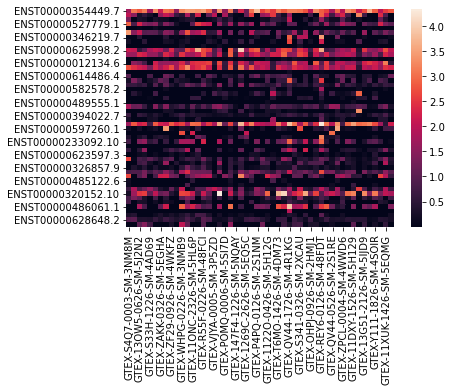

In [20]:
seaborn.heatmap(practice)

In [16]:
glue = seaborn.load_dataset("glue").pivot("Model", "Task", "Score")
glue

Task,CoLA,MNLI,MRPC,QNLI,QQP,RTE,SST-2,STS-B
Model,,,,,,,,
BERT,60.5,86.7,89.3,92.7,72.1,70.1,94.9,87.6
BiLSTM,11.6,65.6,81.8,74.6,62.5,57.4,82.8,70.3
BiLSTM+Attn,18.6,67.6,83.9,74.3,60.1,58.4,83.0,72.8
BiLSTM+CoVe,18.5,65.4,78.7,70.8,60.6,52.7,81.9,64.4
BiLSTM+ELMo,32.1,67.2,84.7,75.5,61.1,57.4,89.3,70.3
ERNIE,75.5,92.3,93.9,97.3,75.2,92.6,97.8,93.0
RoBERTa,67.8,90.8,92.3,95.4,74.3,88.2,96.7,92.2
T5,71.6,92.2,92.8,96.9,75.1,92.8,97.5,93.1


<AxesSubplot:xlabel='Task', ylabel='Model'>

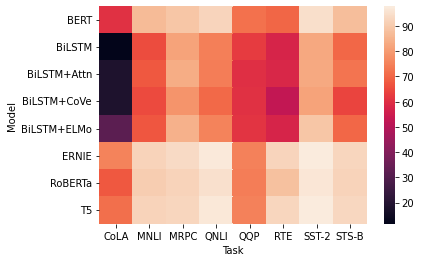

In [17]:
seaborn.heatmap(glue)

In [ ]:
%%time
#evaluate the goodness score for each cluster to select the best possibility.
cluster_numbers = list(range(2, 100))

number_clust_L = [] 
goodness_chs_L = []
goodness_dbs_L = []
goodness_ss_L = []

for nb in cluster_numbers:
    kmeans_model = KMeans(n_clusters = nb, random_state=1).fit(df)
    labels = kmeans_model.labels_
    goodness_chs = metrics.calinski_harabasz_score(df, labels)
    goodness_dbs = metrics.davies_bouldin_score(df, labels)
    goodness_ss = sklearn.metrics.silhouette_score(df, labels, metric='cosine')
    
    #save score in list
    number_clust_L.append(nb)
    goodness_chs_L.append(goodness_chs)
    goodness_dbs_L.append(goodness_dbs)
    goodness_ss_L.append(goodness_ss)

#convert to dict then to DF
d = dict(Number = number_clust_L, Goodness_CHS = goodness_chs_L, 
         Goodness_DBS = goodness_dbs_L, Goodness_SS = goodness_ss_L)

df_goodness = pandas.DataFrame.from_dict(d, orient='columns')

df_goodness.head()

In [ ]:
#plot the Goodness on the number to determine the best one.
##calinski_harabasz_score
seaborn.lineplot(data = df_goodness, x = 'Number', y = 'Goodness_CHS', marker="o")
plt.grid(ls=':', alpha = 0.5)
plt.title('calinski_harabasz')
print('the elbow curve is at between 8 and 11')


In [ ]:
#davies_bouldin_score
seaborn.lineplot(data = df_goodness, x = 'Number', y = 'Goodness_DBS', marker="o")
plt.grid(ls=':', alpha = 0.5)
plt.title('davies_bouldin')
print('the plateau start at 9')

In [ ]:
#silhouette_score
seaborn.lineplot(data = df_goodness, x = 'Number', y = 'Goodness_SS', marker="o")
plt.grid(ls=':', alpha = 0.5)
plt.title('silhouette')
print('the plateau start at 6')

In [ ]:
# 10 is the best number of cluster
kmeans_model = KMeans(n_clusters = 9, random_state=1, verbose=True).fit(df)
labels = kmeans_model.labels_
# Find what cluster for each gene
pred_cluster = kmeans_model.predict(df)
print(pred_cluster)
#add the prediction in a column
df['cluster'] = pred_cluster
df.head()

In [ ]:
#to select the good color map scale
print('max is', df.max().max())
print('min is', df.min().min())

In [ ]:
#ATG7 is not in the list
ATG7_1 = 'ENST00000354449.7'
ATG7_2 = 'ENST00000354956.9'

print(df['cluster'][[ATG7_1, ATG7_2]])

In [ ]:
'The two genes are not in the same cluster. They are different'

In [ ]:
seaborn.hls_palette(9)

In [ ]:
#sort the df with the cluster numbers.
df = df.sort_values('cluster')
#pop the cluster column
cluster_uniq = df.pop("cluster")

In [ ]:
#use one color per cluster group
lut = dict(zip(cluster_uniq.unique(), seaborn.hls_palette(9)))
row_colors_clust = cluster_uniq.map(lut)
#plot
seaborn.clustermap(df, cmap='bwr', col_cluster=False, row_cluster=False,
                   row_colors= row_colors_clust, 
                   method = "centroid", metric = 'cosine',
                   yticklabels= '', xticklabels = '',
                   cbar_kws={'label':'expression [log2(tpm+1)]'})